In [63]:
import pandas as pd

In [154]:
df = pd.read_csv('../data/train.csv')

In [155]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [156]:
df.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


In [208]:
# df['fuel_type'].unique()
# df['fuel_type'].value_counts()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,transmission_category
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200,Special Transmission
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,Special Transmission
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900,Special Transmission
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,Special Transmission
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500,Special Transmission
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500,Special Transmission
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000,Unknown
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900,Special Transmission
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900,Special Transmission


In [260]:
df["avg_price"] =  df.groupby(['brand', 'model'])['price'].transform('mean')

df["avg_price"].head()

0    12778.315972
1    11972.785714
2    24054.754098
3    48915.842105
4    64855.673077
Name: avg_price, dtype: float64

In [258]:
df["model"].describe()

count        188533
unique         1897
top       F-150 XLT
freq           2945
Name: model, dtype: object

In [237]:
import re

patterns = {
    "Automatic Transmission": re.compile(
        r'\b(?:A/T|Automatic|Speed A/T|Speed Automatic|Speed DCT Automatic|'
        r'Electronically Controlled Automatic|Transmission w/Dual Shift Mode|'
        r'CVT Transmission|'
        r'Overdrive|8-SPEED AT)\b', 
        re.IGNORECASE
    ),
    
    "Manual Transmission": re.compile(
        r'\b(?:5|6|7|8)-Speed M/T\b|'
        r'\bManual\b|'
        r'\bM/T\b|'
        r'\b6 Speed Mt\b|'
        r'\b6-Speed Manual\b', 
        re.IGNORECASE
    ),
    
    "Special Transmission": re.compile(
        r'\bSingle-Speed Fixed Gear\b|'
        r'\bVariable\b|'
        r'\bTransmission Overdrive Switch\b|'
        r'\b6-Speed Electronically Controlled Automatic with O\b|'
        r'\bCVT-F\b|'
        r'\bSCHEDULED FOR OR IN PRODUCTION\b', 
        re.IGNORECASE
    ),
    
    "Unknown": re.compile(
        r'\b–|'
        r'2\b|'
        r'F\b|'
        r'–\b|'
        r'6 Speed At/Mt\b|'
        r'8-SPEED A/T\b|'
        r'6-Speed\b|'
        r'7-Speed\b', 
        re.IGNORECASE
    )
}

In [238]:
df['transmission_category'] = df['transmission']

for category, pattern in patterns.items():
    df.loc[df['transmission'].str.contains(pattern), 'transmission_category'] = category

In [239]:
df["transmission_category"].unique()
# display(df)

array(['Automatic Transmission', 'Unknown', 'Manual Transmission',
       'Special Transmission', '–'], dtype=object)

In [119]:
df['fuel_type'].value_counts()

fuel_type
Gasoline          165940
Hybrid              6832
E85 Flex Fuel       5406
Diesel              3955
–                    781
Plug-In Hybrid       521
not supported         15
Name: count, dtype: int64

In [7]:
len(df["brand"].value_counts())

57

In [8]:
df.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [9]:
df["price"].describe()

count    1.885330e+05
mean     4.387802e+04
std      7.881952e+04
min      2.000000e+03
25%      1.700000e+04
50%      3.082500e+04
75%      4.990000e+04
max      2.954083e+06
Name: price, dtype: float64

In [10]:
# train["clean_title"] = train["title"].fillna("No") 

In [116]:
df.dtypes

id               int64
brand           object
model           object
model_year       int64
milage           int64
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price            int64
dtype: object

# Visualization

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

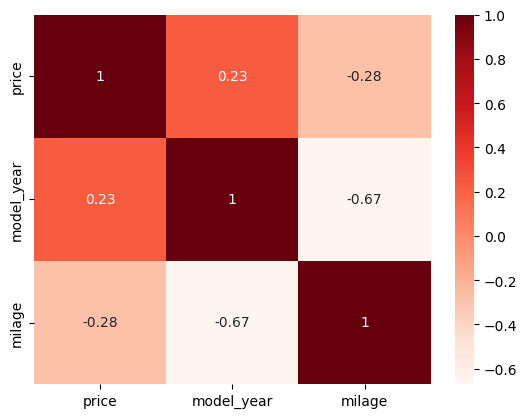

In [115]:
cor = df[["price", "model_year", "milage"]].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

<Axes: xlabel='fuel_type', ylabel='price'>

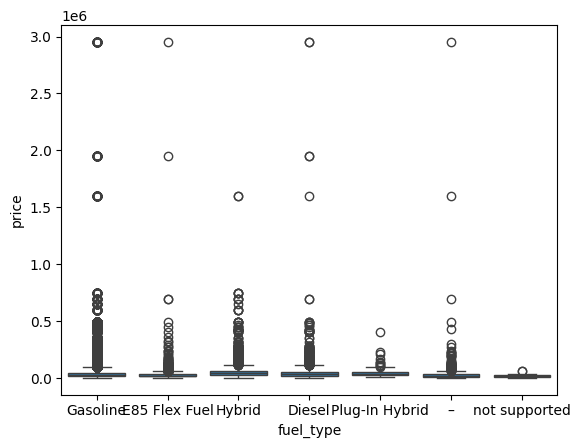

In [12]:
sns.boxplot(x = "fuel_type", y = "price", data = df)

<Axes: xlabel='price', ylabel='brand'>

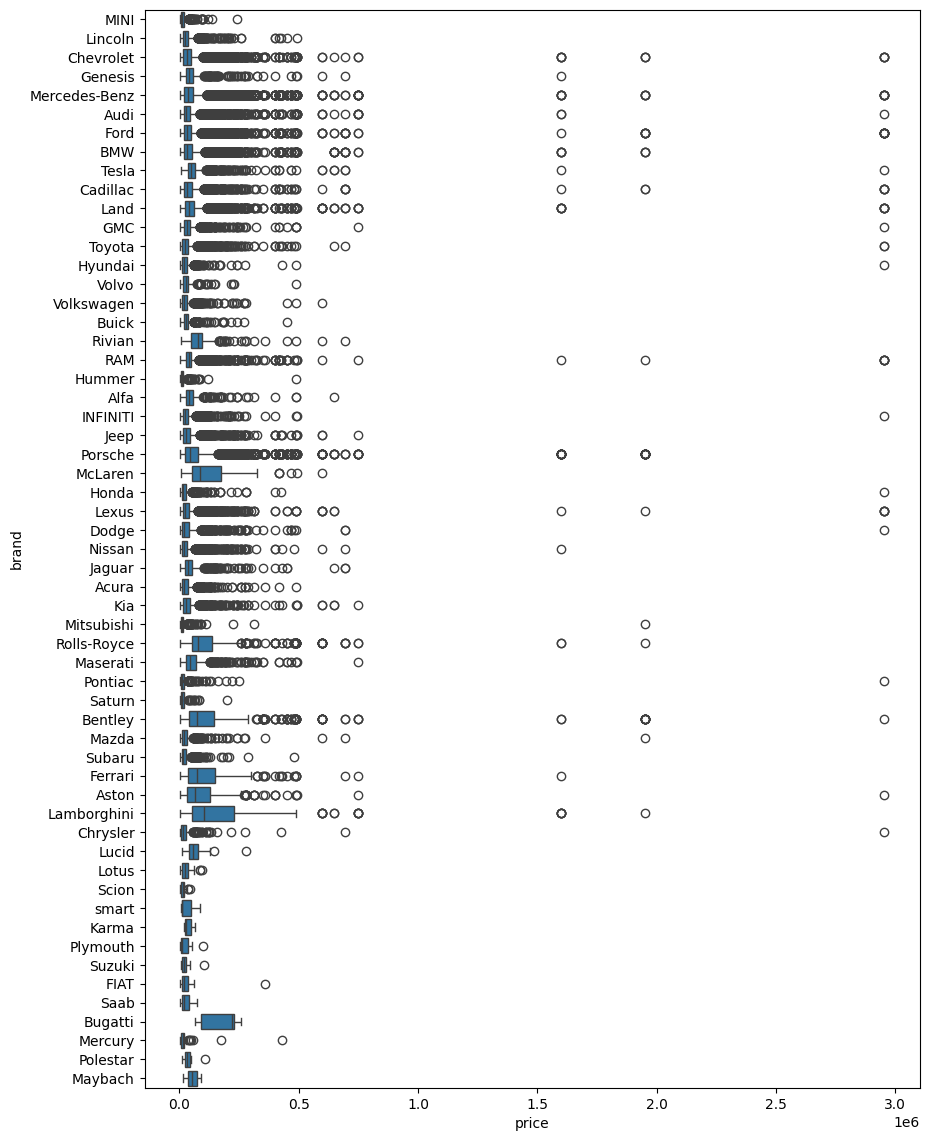

In [13]:
plt.figure(figsize=(10, 14))
sns.boxplot(x = "price", y = "brand", data = df)

In [14]:
df["price_under_1M"] = df["price"] < 1000000
# train["price_under_1M"] = train["price"] < 1e6

In [15]:
df

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,price_under_1M
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200,True
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,True
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900,True
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,True
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500,True
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000,True
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900,True
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900,True


# Filter rows

In [55]:
df["clean_title"] = df["clean_title"].fillna("NaN")

In [56]:
df["clean_title"].unique()

array(['Yes', 'NaN'], dtype=object)

In [57]:
df["age"] = 2024 - df["model_year"]
df["milage_per_year"] = df["milage"] / df["age"]

In [58]:
df["age"].describe()

count    188533.000000
mean          8.170002
std           5.660967
min           0.000000
25%           4.000000
50%           7.000000
75%          11.000000
max          50.000000
Name: age, dtype: float64

In [59]:
df["milage_per_year"].describe()

/Users/akiuehata/Desktop/kaggle/progression-car-price/.venv/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    1.885330e+05
mean              inf
std               NaN
min      5.263158e+00
25%      5.167000e+03
50%      8.000000e+03
75%      1.100000e+04
max               inf
Name: milage_per_year, dtype: float64

In [60]:
train_expensive = df[df["price_under_1M"] == False]
train_cheap = df[df["price_under_1M"] == True]


In [61]:
train_expensive

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,price_under_1M,age,milage_per_year
220,220,Ford,F-150 XLT,2021,26315,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,Agate Black Metallic,Black,None reported,Yes,2954083,False,3,8771.666667
1880,1880,Chrysler,300C Base,2003,55900,Gasoline,340.0HP 5.7L 8 Cylinder Engine Gasoline Fuel,5-Speed A/T,Beige,Beige,None reported,Yes,2954083,False,21,2661.904762
2964,2964,Porsche,911 R,2023,714,Gasoline,4.0L H6 24V GDI DOHC,6-Speed Manual,White,Gray,None reported,Yes,1950995,False,1,714.000000
4164,4164,Rolls-Royce,Ghost Base,2016,38800,Gasoline,563.0HP 6.7L 12 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes,1599000,False,8,4850.000000
8789,8789,Lamborghini,Gallardo LP570-4 Superleggera,2011,3254,Gasoline,5.2L V10 40V GDI DOHC,7-Speed Automatic with Auto-Shift,Nero Noctis,Nero Ade,None reported,Yes,1950995,False,13,250.307692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183262,183262,Bentley,Continental GT Speed,2022,22001,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,1950995,False,2,11000.500000
183468,183468,Bentley,Continental GT V8,2021,59766,Gasoline,4.0L V8 32V GDI DOHC Twin Turbo,8-Speed Automatic,Dark Sapphire,Linen,None reported,Yes,2954083,False,3,19922.000000
185197,185197,Ford,F-250 King Ranch,2022,44457,Diesel,6.7L V8 32V DDI OHV Turbo Diesel,Automatic,Summit White,Medium Earth Gray,At least 1 accident or damage reported,Yes,1950995,False,2,22228.500000
186234,186234,Land,Rover Range Rover Sport HSE,2017,2437,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,A/T,Black,Black,None reported,Yes,1599000,False,7,348.142857


In [42]:
train_expensive.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,price_under_1M
220,220,Ford,F-150 XLT,2021,26315,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,Agate Black Metallic,Black,None reported,Yes,2954083,False
1880,1880,Chrysler,300C Base,2003,55900,Gasoline,340.0HP 5.7L 8 Cylinder Engine Gasoline Fuel,5-Speed A/T,Beige,Beige,None reported,Yes,2954083,False
2964,2964,Porsche,911 R,2023,714,Gasoline,4.0L H6 24V GDI DOHC,6-Speed Manual,White,Gray,None reported,Yes,1950995,False
4164,4164,Rolls-Royce,Ghost Base,2016,38800,Gasoline,563.0HP 6.7L 12 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes,1599000,False
8789,8789,Lamborghini,Gallardo LP570-4 Superleggera,2011,3254,Gasoline,5.2L V10 40V GDI DOHC,7-Speed Automatic with Auto-Shift,Nero Noctis,Nero Ade,None reported,Yes,1950995,False


In [43]:
df["accident"].unique()

array(['None reported', 'At least 1 accident or damage reported', nan],
      dtype=object)

<Axes: xlabel='accident', ylabel='price'>

/Users/akiuehata/Desktop/kaggle/progression-car-price/.venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 38.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


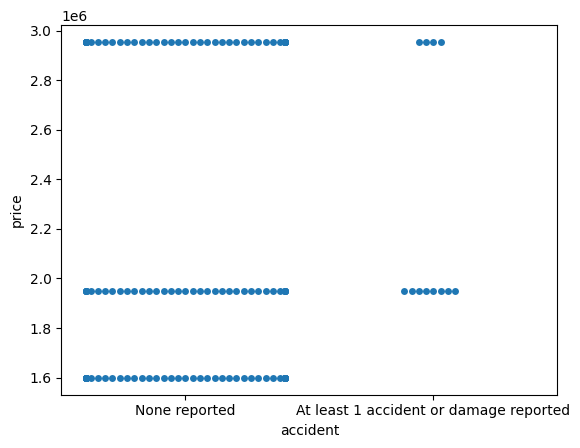

In [44]:
sns.swarmplot(x = "accident", y = "price", data = train_expensive)

<Axes: xlabel='model_year', ylabel='price'>

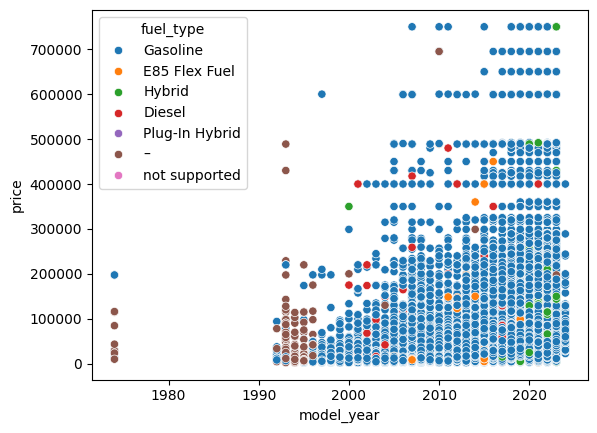

In [45]:
sns.scatterplot(x = "model_year", y = "price", hue = "fuel_type", data = train_cheap)

<Axes: xlabel='model_year', ylabel='price'>

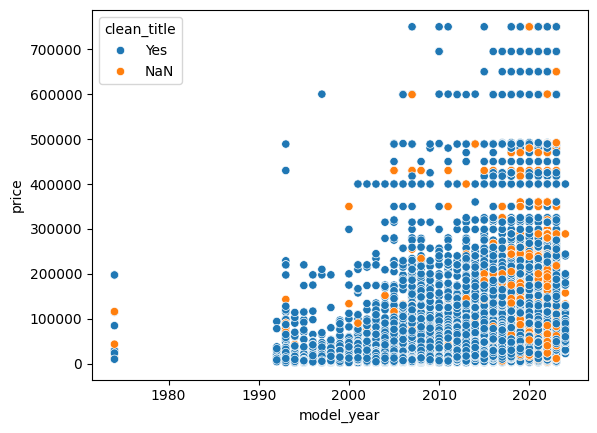

In [46]:
sns.scatterplot(x = "model_year", y = "price", hue = "clean_title", data = train_cheap)

<Axes: xlabel='milage_per_year', ylabel='price'>

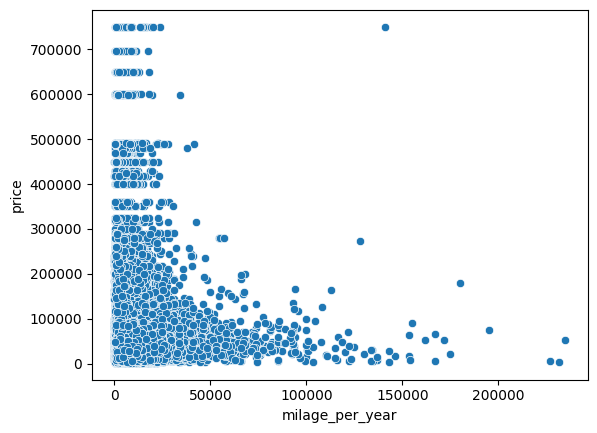

In [62]:
sns.scatterplot(x = "milage_per_year", y = "price", data = train_cheap)

# Developing a Model

In [103]:
def preprocess(df: pd.DataFrame) -> pd.DataFrame:
    res = df.copy()
    res["clean_title"] = res["clean_title"].fillna("NaN")
    res["is.clean_title"] = res["clean_title"] == "Yes"
    res["age"] = (2024 - res["model_year"]).map(lambda x: max(x, 1))
    res["milage_per_year"] = res["milage"] / res["age"]
    res["had_accident"] = res["accident"] == "At least 1 accident or damage reported"
    return res

In [104]:
from sklearn.model_selection import train_test_split
preprocessed = preprocess(df)
train, val = train_test_split(preprocessed, test_size = 0.3, random_state = 42)

In [101]:
X_train = train[["is.clean_title", "milage_per_year", "had_accident"]]
y_train = train["price"]

In [76]:
from sklearn.ensemble import RandomForestRegressor

In [84]:
forest = RandomForestRegressor(n_estimators = 100, random_state = 42)
forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [85]:
X_val = val[["is.clean_title", "milage_per_year", "had_accident"]]
y_val = val["price"]

In [86]:
y_pred = forest.predict(X_val)

In [89]:
result = pd.DataFrame({"y_val": y_val, "y_pred": y_pred})
result["diff"] = result["y_val"] - result["y_pred"]

In [90]:
result

,y_val,y_pred,diff
111355,37999,43507.932796,-5508.932796
182258,30000,71543.937651,-41543.937651
14147,26772,33188.262583,-6416.262583
79313,24999,31200.180238,-6201.180238
101160,47995,59595.003564,-11600.003564
...,...,...,...
95824,26500,37158.442825,-10658.442825
183599,54500,42661.719417,11838.280583
10343,10000,19724.483949,-9724.483949
76346,22989,31448.690000,-8459.690000


In [93]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [94]:
np.sqrt(mean_squared_error(y_val, y_pred))

np.float64(78483.74170963286)

# Submisstion

In [105]:
test = pd.read_csv('../data/test.csv')
test_preprocessed = preprocess(test)

In [107]:
X_test = test_preprocessed[["is.clean_title", "milage_per_year", "had_accident"]]

In [108]:
y_submit = forest.predict(X_test)

In [109]:
test["price"] = y_submit

In [111]:
test[["id", "price"]].to_csv("../submission/20240909-random-forest.csv", index = False)